<img src='https://arrowprestigelimo.com/wp-content/uploads/2011/07/medical-appointment-arrow-prestige-limousine.jpg'/>

<center><h1>Medical Appointments in Vitória - Brazil</h1></center>

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#about_data">About the Data</a></li>
<li><a href="#research_question">Research Question</a></li>
<li><a href="#overview">Overview of the data</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#date_versus_attended">Attended versus Not Attended by day</a></li> 
<li><a href="#neighborhood_vs_attended">Attended versus Not Attended by Neighborhood</a></li> 
<li><a href="#waiting_time">Waiting Time versus No-show</a></li> 
<li><a href="#age">Age versus No-show</a></li> 
<li><a href="#sms_received">SMS Received versus No-Show</a></li>
<li><a href="#bolsa_familia">Government Allowance versus No-Show</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources_used">Resources used</a></li> 
</ul>

<a id='intro'></a>
## Introduction

This project will use and dataset about medical appointments in the city of Vitória - Brazil.

The objective of this work is to understand why 20% of the appointments in the dataset were missed by the patients. In order to do that, I'll conduct an Exploratory Data Analysis in a dataset from Kaggle.

### Importing data and packages

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import math
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import pearsonr


In [183]:
#loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates=True, index_col='PatientId')

#changing the column names and separating words by a underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='about_data'></a>
### About the data

- `appointmentid`: The number that identificate the appointment
- `gender`: Patient's gender
- `scheduledday`: Day when the appointment was scheduled
- `appointmendday`: Date of the appointment
- `age`: Patient's age
- `neighbourhood`: Hospital's neighborhood
- `scholarship`: This variable point out if the patient receives 'Bolsa Família'.
- `hipertension`: This variable states if the patient has hypertension or not
- `diabetes`: This variable states if the patient has diabetes or not
- `alcoholism`: This variable states if the patient is an alcoholic or not
- `handcap`: This variable shows if the patient has some kind of disadvantage
- `sms_received`: This variable shows if the patient had received an sms to remember of the appointment
- `no-show`: If the patient hasn't shown up for the appointment. Note that here a "No" means that patient attended the appointment.


<a id='research_question'></a> 
## Research Question: Which factors influence the most in  the number of no-shows?

The main objective of this work is to explore the data about medical appointments and identify which variables are more correlated with the number of patients that don't show-up for their appointments.

Some questions that I want to investigate using the data that we have:
1. Is the number of patients who attended their appointments and those who don't attend their appointments steady in the data that we have?
2. In our data, we just have data about the neighborhoods where the hospitals are located, the ideal was to investigate in a hospital level. But, one interesting thing to answer is: is there a correlation between the number of patients who attend their appointments and those who don't? 
3. The waiting time influence in the probability of the patient attending the appointment?
4. The age of the patient influence in the probability of the patient attending the appointment?
5. Receiving a reminder is helpful for the hospitals to decrease the number of patient that don't show-up?
6. Is there a significant difference in the proportions of patients who show-up for the appointments when you compare the people that receive 'Bolsa Família' and those who don't?

#### This project will consist of four steps:
1. Overview of the dataset.
2. Data Wrangling.
3. Exploratory Data Analysis.
4. Conclusion

<a id='overview'></a>
### Overview of the dataset

In [184]:
df.dtypes

appointmentid      int64
gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no-show           object
dtype: object

Some considerations about the variable types:
- I want to convert the variables `scholarship`, `hipertension`,`diabetes`,`alcoholism`, `handcap` and `sms_received` to an object because in my opinion they are more informative to the audience.
- The pd.read_csv() function wasn't able to parse the dates, probably, there are some issues in our date variables.
- The appointmentid variable is an integer, but I'll not perform operations with it, so I will convert it to an object.

In [185]:
df.nunique()

appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

With this column, it's possible to see some inconsistencies within our data:
- There are much more diversity in the variable `scheduledday` than in the `appointmentday`. Probably, is something related to the format of the datetime string.
- Some values in the scheduled day may be missing values, duplicates or values that are equal.
- The variable `handcap` appeared to be a variable with just zeros and ones, but now it's possible to see that there  are other values in it. Probably, it's better to manipulate it to transform it into a ordinal categorical variable.
- There are hospitals in 81 neighborhoods.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 13 columns):
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


Apparently, there aren't missing values in our dataframe

In [187]:
sum(df.duplicated())

0

There aren't entire rows duplicated within our dataset.

<a id='wrangling'></a>
### Data Wrangling

0. Convert to object: `scholarship`,`hipertension`,`diabetes`,`alcoholism`,`handcap`,`sms_received`. I will transform the ones in a 'Yes' and the zeros in  a 'No'.

1. Convert to a datetime: `scheduledday` and `appointmentday`

2. Create a waiting_time column based in the difference betweem the `appointmentday` and the `scheduledday` columns.

3. Changing the names of same columns: 
    - I want to change the column name to family_allowance because 'Bolsa Família' is a social program that concedes money for low-income families and they can spend this money in a way that best suits the family needs.
    - The variable `no-show` isn't very intuitive because if a patient is listed as "No", he attended the appointment. So I will invert this logic by replacing 'No' by 'Yes' and vice-versa. I'll also change the column name to `attended_appointment`
    - make the variable names: `hipertension`,`alcoholism`,`handcap`,`diabetes` and`scheduledday` more informative.
4. Identify the meaning of each value in the `handcap` variable


#### Problem 0: Transforming integers in Objects

In [188]:
list_variables = ['scholarship','hipertension','diabetes','alcoholism','sms_received']

for i in list_variables:
    df[i] = np.where(df[i] == 1, 'Yes', 'No')

#### Problem 1: Converting to datetime

In [189]:
print('Head:\n' + str(df[['scheduledday','appointmentday']].head()))
print('Tail:\n' + str(df[['scheduledday','appointmentday']].tail()))

Head:
                      scheduledday        appointmentday
PatientId                                               
2.987250e+13  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z
5.589978e+14  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z
4.262962e+12  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z
8.679512e+11  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z
8.841186e+12  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z
Tail:
                      scheduledday        appointmentday
PatientId                                               
2.572134e+12  2016-05-03T09:15:35Z  2016-06-07T00:00:00Z
3.596266e+12  2016-05-03T07:27:33Z  2016-06-07T00:00:00Z
1.557663e+13  2016-04-27T16:03:52Z  2016-06-07T00:00:00Z
9.213493e+13  2016-04-27T15:09:23Z  2016-06-07T00:00:00Z
3.775115e+14  2016-04-27T13:30:56Z  2016-06-07T00:00:00Z


Those columns have some problems that need to be solved before converting them to date time:
1. They have a 'T' between the date and the time
2. They have a 'Z' on the final of each string.
3. In the `scheduledday` variable there is information about when the appointment was scheduled. But, there isn't information about the time of the appointment, only the date.

We have two options to solve this issues. 

- One way to solve this problem without losing data is to replace the 'T' by spaces. In the next step, is necessary to remove the 'Z' at the end of all strings.

- The second way is to get only the first 10 letters of each row. With this approach, we won't be able to get the time of the variables because they will be removed.

In order to get the same informations of the two variables, I'll use the second approach because we don't have information about the time in the `appointmentday` variable.


    

In [190]:
def to_datetime_cols(data, col):
    """This function was created to convert two variables of this specific
    dataframe. The name of the cols are: 'appointmentday' and 'scheduledday'.
    
    data: must be a dataframe
    col: must be 'appointmentday' or 'scheduledday'
    """
    data[col] = data[col].str[:10] #Replacing the T for spaces and removing the Z
    data[col] = pd.to_datetime(data[col], infer_datetime_format=True)#Converting the column to datetime
    return data[col] #returning the desirable column converted

df['scheduledday'] = to_datetime_cols(df, 'scheduledday')
df['apppointmentday'] = to_datetime_cols(df, 'appointmentday')

#### Problem 2: Creating the waiting_time variable

Below, I will create a variable that displays the difference between the day that the appointment was meant to occur and the day that the appointment has been scheduled. This variable will be important to our analysis because it will make possible to identify if the waiting time influences is correlated with the patients attending the appointments.

I would like to thank `jezrael` for this [answer](https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer) at StackOverflow because it helped me figure out how to get an integer of a difference between datetimes.

In [191]:
def waiting_time_days(data):
    """ This function was created to get the difference between to dates
    and convert it to an integer.
    
    data: this function is restricted to the data frame to this dataframe.
    
    """
    #getting the difference between the two variables. It will yields a datetime ojbect
    data['waiting_time'] = (data['appointmentday'] - data['scheduledday'])
    #after that, we use the following formula and it tranforms the day diffrence in a float format
    #after getting this float, we convert it to a integer
    data['waiting_time'] = (data['waiting_time'] / np.timedelta64(1, 'D')).astype('int64')
    return data['waiting_time']

df['waiting_time'] = waiting_time_days(df)
   
df[['appointmentday','scheduledday','waiting_time']].head(8)

,appointmentday,scheduledday,waiting_time
PatientId,,,
2.987250e+13,2016-04-29,2016-04-29,0
5.589978e+14,2016-04-29,2016-04-29,0
4.262962e+12,2016-04-29,2016-04-29,0
8.679512e+11,2016-04-29,2016-04-29,0
8.841186e+12,2016-04-29,2016-04-29,0
9.598513e+13,2016-04-29,2016-04-27,2
7.336882e+14,2016-04-29,2016-04-27,2
3.449833e+12,2016-04-29,2016-04-27,2


#### Problem 3: Changing the names of same variables

##### Problem 3.1: `Scholarship` variable and renaming it.

In [192]:
df.rename(columns={'scholarship': 'gvt_allowance'}, inplace=True)

##### Problem 3.2: Inverting the logic of the `no-show` variable and renaming it

In [193]:
df['no-show'] = np.where(df['no-show'] == 'Yes', 'No', 'Yes')

df.rename(columns={'no-show': 'attended_appointment'}, inplace=True)

##### Problem 3.3: making column names more intuitive:

In [194]:
df.rename(columns={'hipertension': 'has_hipertension', 'diabetes': 
                   'has_diabetes', 'alcoholism': 'is_alcoholic',
                   'scheduledday': 'appointment_scheduled_in'}, inplace=True)

#### Problem 4

I couldn't find the meaning of the values of these column, so I'll not use it in the analysis.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='date_versus_attended'></a>
#### Is the number of patients who attended their appointments and those who don't attend their appointments steady in the data that we have?

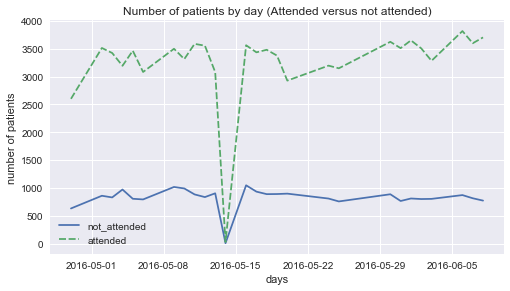

In [197]:
def pivoting_data_lplot(data, column, index_col, func):
    """The objective of this function is to make more easy
    the transformation of a groupby object into a dataframe
    almost ready for creating a line plot.
    
    data: must be a dateframe
    
    column: the name of the variable that will be pivoted
    
    index_col: the name of the column that will be the index of the
    final df.
    
    func = The aggregation function that will be passed in the
    groupby function. For example, if your variable is numeric, it 
    can be the mean, median, etc. If your variable is categorical
    use len.
    
    Limitations of this function:
    It just works with aggregations with two columns.
    
    """
    data1 = data.groupby([column, index_col]).agg(func)['appointmentid']

    data1 = data1.reset_index()

    data1 = data1.pivot(index=index_col,
            columns=column,
            values='appointmentid')

    return data1

date_df = pivoting_data_lplot(df, 'attended_appointment','appointmentday', len)

date_df.columns = ['not_attended','attended']
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
_ = sns.lineplot(data=date_df, ax=ax)
_ = plt.tight_layout()
_ = plt.title('Number of patients by day (Attended versus not attended)')
_ = plt.xlabel('days')
_ = plt.ylabel('number of patients')


1. It seems that we don't have the data about the day 2016-05-05.
2. In general, the number of people who don't attend their appointments is steady.
3. The number of people who are attending, otherwise, seems to be oscilating more. However, plots can be misleading, I'll get the standard deviations of both variables to compare.

In [198]:
date_df.describe()

,not_attended,attended
count,27.000000,27.000000
mean,826.629630,3266.962963
std,185.763735,698.241058
min,9.000000,30.000000
25%,803.500000,3196.500000
50%,837.000000,3466.000000
75%,895.500000,3560.500000
max,1049.000000,3819.000000


Some considerations:
1. The day with the maximum number of patients who attended the appointments had 3819 patients.
2. The day with the maximum number of patients who didn't attend had 1049 patients who have missed their appointments.
3. The interquantile of the both variables is equal to 92 and 364, respectively.
4. As expected, the `attended` has an standard deviation higher than the `not_attended` variable.
5. The mean number of appointments missed by patients per day is 826.
6. In average, 3266 patients, attend their appointments per day.

<a id='neighborhood_vs_attended'></a>
#### Is there a correlation between the number of patients who attend their appointments and those who don't?

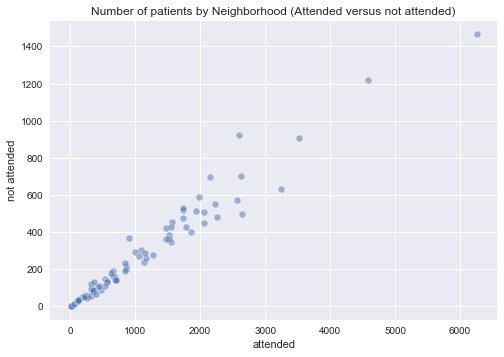

Summary Statistics: 
       not attended     attended
count     79.000000    79.000000
mean     282.493671  1116.544304
std      277.991324  1096.108382
min        1.000000     7.000000
25%       81.500000   328.500000
50%      190.000000   710.000000
75%      428.500000  1648.000000
max     1465.000000  6252.000000

The correlations is: (0.9766720133060586, 3.3421633729044563e-53)


In [199]:
#I'll use the same function that I created before. #But, now, insteady 
#of grouping by date, I'll group by The neighborhood of the hospitals

neighborhood = pivoting_data_lplot(df, 'attended_appointment', 
                                   'neighbourhood', len)

#renaming columns
neighborhood.columns = ['not attended', 'attended']

#creating scatterplot
#I will set alpha to 0.5 because there are values that are overlapping.
sns.scatterplot(x='attended', y='not attended', 
                data=neighborhood, legend='brief',
               alpha=0.5)  
plt.title('Number of patients by Neighborhood (Attended versus not attended)')
plt.show()

neighborhood = neighborhood.dropna()

correlation = pearsonr(neighborhood['attended'], neighborhood['not attended'])

print('Summary Statistics: \n' + str(neighborhood.describe()) + '\n')

print('The correlations is: ' + str(correlation))

According to the plot and to the pearsonr value, there is almost a perfect correlation between the number of patients who attended the appointments by neighborhood and those who don't.

1. In average, each neighborhood had 282 patients missing their appointments in the period and 1116 patients who went to their appointments.
2. We can't say that the distribution is right skewed because the median is lower than the mean.
3. There is a neighborhood where 1465 patients losed their appointments in the period.


<a id='waiting_time'></a>
#### The waiting time influence in the probability of the patient attending the appointment?

Is important to clarify that even if a correlation exists between the two variables, there may be other lurking variables like:

- People who have forgotten about the appointment.
- If it is the first appointment of the patient.
- The patient lose its interest in the appointment due to the long waiting time.

#### Summary Statistics - Waiting Time

In [200]:
print(str(df['waiting_time'].describe()) + '\n')
print('Proportion of people who have attended the appointment: \n' + str(df['attended_appointment'].value_counts()) )

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

Proportion of people who have attended the appointment: 
Yes    88208
No     22319
Name: attended_appointment, dtype: int64


For some reason, there are some rows where the waiting time is negative. This doesn't have practical sense, so I'll not use them while conducting the analysis about the waiting time.

The median waiting time is 4 days and the mean is 10 days.

The Interquartile range is 15 days.

#### Setting up a function to create histograms with multiple subsets

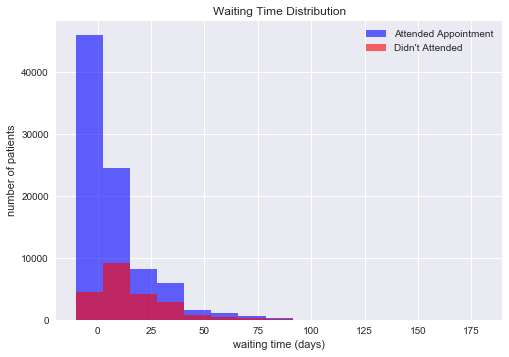

In [201]:
def getting_histograms(data, xlabel, ylabel, title, col, 
                       range_values, bins, density):
    """This function was created to make easy the creation of
    histograms with two different groups differentiated by the
    color.
    
    data: must be a dataframe with a column named `atttended_appointment`
    xlabel: label of the x-axis
    ylabel: label of the y-axis
    title: title of the plot
    col: the name of the column of interest. Must be a numeric variable.
    range: the min and the max values of the column.
    bins: must be a numeric value. The recommended value is 30.
    density: Must be a boolean. If you want a density plot, you should put
    'True' and if you want a plot with absolute values, is better to put
    'False'.
    """
    data1 = data[data['attended_appointment'] == 'Yes']
    data2 = data[data['attended_appointment'] == 'No']
    _ = plt.hist(data1[col], bins=bins, range=range_values, 
                 color='blue', alpha=0.6, density=density)
    _ = plt.hist(data2[col], bins=bins, range=range_values, 
                 color='red', alpha=0.6)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.title(title)
    _ = plt.legend(["Attended Appointment", "Didn't Attended"])
    
    return _

#Creating the arguments for the function.
xlabel = 'waiting time (days)'
ylabel = 'number of patients'
title = 'Waiting Time Distribution'
col = 'waiting_time'
range_ = (-10, 180)
bins = 15

_ = getting_histograms(df, xlabel, ylabel, title, col, range_, 15, False)
plt.show()


Some considerations about the histogram above:

1. Most of the patients (more than 60.000 in a sample of 110.000) had a waiting time inferior to 15 days.
2. The proportion of patients not attending the appointments seems to grow when the waiting time increases.

The next step of our analysis is to create two subsets of the data. The first subset will be the values that are lower than the median. The second will be the  values that are higher than the median. But, before doing that, I will create a dataframe without the observations in the `waiting_time` variable inferior to zero.

In [202]:
#filtering for values >= zero.
waiting_df = df[df['waiting_time'] >= 0]

#callculating the median waiting time
median = waiting_df['waiting_time'].median()

#waiting time - Lower than the median
low_waiting_time = waiting_df[waiting_df['waiting_time'] < median]

#waiting time - Higher than the median
high_waiting_time = waiting_df[waiting_df['waiting_time'] >= median]

#### Summary Statistics - Low Waiting Time and High Waiting Time

In [203]:
print('Low waiting time\nProportion who have attended the appointmens ')
print(str(low_waiting_time['attended_appointment'].value_counts() / len(low_waiting_time)) + '\n')
print('High waiting Time\nProportion who have attended the appointments')
print(str(high_waiting_time['attended_appointment'].value_counts() / len(high_waiting_time)) + '\n')

Low waiting time
Proportion who have attended the appointmens 
Yes    0.903246
No     0.096754
Name: attended_appointment, dtype: float64

High waiting Time
Proportion who have attended the appointments
Yes    0.700388
No     0.299612
Name: attended_appointment, dtype: float64



Seems like `attended_appointment` variable is dependent of the variable `waiting_time`, since the proportion of observations who have shown up for the appointment decreased by 20% when you compare the sample with a waiting time lower than the median with the other group.

However, before concluding that this correlation is real, is necessary to conduct an hypotheses test.

#### Hypotheses Test - Comparing two sample proportions:

h0 (Null Hypotheses): the difference between the two proportions are equal  
h1 (Alternative Hypotheses): the difference between the two proportions are different

To conduct this kind of hypotheses test, there are some conditions that must be met. The conditions were found in this [site](http://www.b-g.k12.ky.us/userfiles/1525/Classes/33386/Conditions%20of%20Tests.08-09%20rev%201.pdf) on the page 5.

##### The conditions are:

- The samples must be independent of each other: This condition is met since the decision of showing up for the appointment or not of a patient doesn't affect the decision of the other patients
- To either conduct a hypotheses testing or to calculate the confidence interval, there must be at least 5 successes for each of the possibilities. Our sample size is very big, so this condition is also met.

##### Steps to conduct this hypotheses test:

1. Calculate the sample proportions of each samples.
    - Success: When a patient attended the appointment
    - Failure: When a patient didn't attended the appointment
2. Calculating the difference between the two proportions:
    - $ \hat{p_1} - \hat{p_2} $
2. Calculating the Standand Error (SE) of two samples 
    - $ \sqrt{\frac{\hat{p_1} * (1-\hat{p_1})}{n_1} + \frac{\hat{p_2} * (1-\hat{p_2})}{n_2}}$
2. Calculating the Critical Score
    - $ \frac{(\hat{p_1}\space -\space \hat{p_2}) \space-\space h0}{SE}  $
4. Calculating the p-value:
    - We use the critical score to identificate the p value on the z-table, however for practical reasons, I'll use the value on a function called `norm.sf` from the `scipy.stats` package to get the p-value.
    
##### Confidence Intervals:
To calculate the confidence interval, there are some common steps with the hypotheses test. We need to calculate the standard error and the difference between the two proportions. However there are some differences.
1. Calculate the difference between the two proportions
2. Calculate the Standard Error
3. Calculating the upper and lower bounds of the confidence interval:
     - $ \hat{p_1} - \hat{p_2} \pm{\text{z*} * \text{SE}} $
4. It's important to point out that z* is not the critical score that we get when its being calculated the p value, but a value of the z-table dependent of the confidence interval that was chose. In this analysis, I'll use an 95% confidence interval, hence, the z* will be 1.96.

Below, I'll setup a function to carry out to calculate the p-value and the confidence interval.

In [204]:
def hypotheses_test_and_CI(data1, data2, col):
    """
    This function was created to conduct an hypotheses test
    between two different proportions. To execute this function,
    firstly, it is necessary to get the two subsets of the data
    that you want to compare. This function is suited for comparing
    only two proportions, generally, your 'col' argument must have only
    two categories.
    
    data1: the first subset of a dataframe
    
    data2: the second subset of a dataframe
    
    col: must me the variable that you want to compare the 
    proportions between the two groups. In the first case, 
    for example, the col variable will be `attended appointment`.
    
    Lastly, is important to say that this function is suitable
    for two-way hypotheses testing because it multiplies the p-value
    by two at the end of the function.
    """
    #total sample size of the first group
    n1 = sum(data1[col].value_counts())

    #total sample size of the second group
    n2 = sum(data2[col].value_counts())

    # proportion of persons who have attended the appointment in the group 
    # with waiting time lower than the median
    p_hat1 = data1[col].value_counts()[0] / n1

    #proportion of persons who have attended the appointment in the
    #group with waiting time higher than the median
    p_hat2 = data2[col].value_counts()[0] / n2

    #standard Error of two proportions test
    SE_proportion = math.sqrt((p_hat1*(1-p_hat1))/n1 + (p_hat2*(1-p_hat2))/n2) 

    null_hypotheses = 0
    critical_score = ((p_hat1 - p_hat2) - null_hypotheses) / SE_proportion
    
    #Calculation of the p-value
    p_value = norm.sf(abs(critical_score)) * 2
    
    #Confidence Interval Calculation
    lower_bound = round((p_hat1 - p_hat2) - (1.96 * SE_proportion), 2)
    higher_bound = round((p_hat1 - p_hat2) + (1.96 * SE_proportion), 2)
    
    return p_value, lower_bound, higher_bound


p_value, lower_bound, upper_bound = hypotheses_test_and_CI(low_waiting_time, 
                                                           high_waiting_time,
                                                          'attended_appointment')
#Calculating the p_value
#As this a two-sided hipotheses test, I'll multiply the result by 2.

print('The p-value of this hypotheses test is: ' + str(p_value))
print('95% CI:('+ str(lower_bound) + ', ' + str(upper_bound) +')')

The p-value of this hypotheses test is: 0.0
95% CI:(0.2, 0.21)


##### Results of the hypotheses test:

The most common $\alpha$ used for hypotheses testing is 0.05, sometimes is good to use different significant levels, like when is more costly to commit a type one error or a type two errors. However, in this case, I believe that adopting a significance level of 0.05 is the better option.

According to the function `norm.sf` the p-value for our hypotheses is 0. Hence, we can reject the null hypotheses that the difference between the proportions is zero and accept the alternative hypotheses that there is a difference between the two proportions.

##### Interpretation of the confidence interval:

According to the confidence interval calculated, is possible to say that we are 95% confidence that difference between the two population proportions lies between 20% and 21%.

<a id='age'></a>
#### The age of the patient influence in the probability of the patient attending the appointment?

#### Summary Statistics

In [205]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Firstly, I thought that those negative ages were NA values, however, after searching in the discussion forums of the Kaggle Dataset, the owner of the dataset stated that negative ages are related to pregnant women who have attended appointments before the babies were born.

The max age is 115 years, probably a typo error when the data was being stored in a database. However, we can't be sure about that, since there are some cases in the history of people living for 115 years.

Let's take a look on the distribution of the age of the patients.

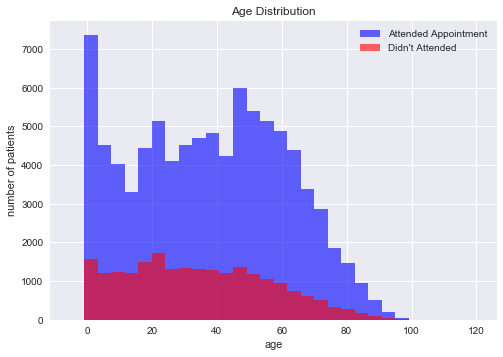

In [206]:
#Setting up the arguments for the function that was constructed earlier.
label1 = 'age'
label2 = 'number of patients'
title = 'Age Distribution'
legend = ['Attended Appointment',"Didn't attended"]
col = 'age'
range_ = (-5, 120)

_ = getting_histograms(df, label1, label2, title, col, range_, 30, density=False)

Looking at this histogram, it seems that the proportion of people who haven't attended the appointments decreases when the age increases. But, I can't say this for sure, since this histogram is using absolute values.

I will create another variable, that divides the observations on our sample in three groups:
1. Child: 0-17 years
2. Adult: 18-59 years
3. Elder: 60+

In [207]:
#Using Np.where to create a new variable based in some conditions
df['group_age'] = np.where(df['age'] >= 60, '60+',
                  np.where(df['age'] >= 18, '18-59', '0-17'))

In [208]:
df['group_age'].value_counts()

18-59    61974
0-17     27380
60+      21173
Name: group_age, dtype: int64

In [209]:
#subsetting to get the proportion of each group
young = df[df['group_age'] == '0-17']
adults = df[df['group_age'] == '18-59']
elders = df[df['group_age'] == '60+']

#Getting an overview of the proportions by group.
young_prop = young['attended_appointment'].value_counts() / len(young)
adults_prop = adults['attended_appointment'].value_counts() / len(adults)
elders_prop = elders['attended_appointment'].value_counts() / len(elders)

print('Attended Appointment (0-17):')
print(str(young_prop))

print('\nAttended Appointment (18-59):')
print(str(adults_prop))

print('\nAttended Appointment (60+):')
print(str(elders_prop))

Attended Appointment (0-17):
Yes    0.780972
No     0.219028
Name: attended_appointment, dtype: float64

Attended Appointment (18-59):
Yes    0.788944
No     0.211056
Name: attended_appointment, dtype: float64

Attended Appointment (60+):
Yes    0.84688
No     0.15312
Name: attended_appointment, dtype: float64


It seems that the proportion of people who attended the appointments that were scheduled increased when the group in observation have more than 60 years.

However, before making conclusions about that, a hypotheses test is needed.

In this case, it is necessary comparing two categorical variables, the `group_age` and `attended_appointment`. 

To conduct a hypotheses test between two categorical variables, I'll use an Chi-Squared Test of Independence.

##### Our hypotheses are:
- h0: The variables are independent
- h1: The variablers are dependent

##### Conditions necessary for this test:

According to this [site](http://www.b-g.k12.ky.us/userfiles/1525/Classes/33386/Conditions%20of%20Tests.08-09%20rev%201.pdf) the conditions for this kind of hypotheses test are:
- Must be a random sample
- All groups must have at least five observations

##### Steps to conduct this hypotheses testing:
1. Calculate the proportions expected if the different groups were equally distributed.
2. Calculate the observed variables in each group
3. Calculating the $\chi^2$:
    - $\chi^2 = \sum{\frac{(\text{Observed Values}\space - \space \text{Expected Values})^2}{\text{Expected Values}}} $
4. Calculating the degrees of freedom:
    - For a $\chi^2$ test of independence, we calculate the degrees of freedom by subtracting 1 of the number of groups in each variable and multiplying them. In the first variable, we have two categories: 'Yes' or 'No'. In the second variable, we have three categories: '0-17', '18-60' and '60+'. The formula for calculating the degrees of freedom in our case is:
    
    $$
    \text{ddof = }(2-1)*(3-1)
    $$
5. The last step is to calculate the p-value. I'll do this using a function of the package `scipy.stats` called `chisquare`

In [210]:
def chisquared_six_groups(data, x, y, label_g1, label_g2, label_g3):
    """This function was created to conduct a Chi-Squared Test of
    Independence between six different combinations of categories.
    The x value must have 3 categories and the y value must have
    two different categories.
    
    data: should be a Pandas.DataFrame
    y: should be the dependent variable (categorical)
    x: should be the independent variable (categorical)
    label_g1 = the label of the first category of x
    label_g2 = the label of the second category of x
    label_g3 = the label of the third category of x
    
    The function will calculate the observed and the expected values
    for each of the categories and assign the values for two numpy
    arrays. Those arrays will be passed in the chisquare() function
    of the scipy.stats package.
    """
    #total number of observations
    n = len(data[y])
    
    #expected proportion for attended and didn't attended
    expected_attd_p = data[y].value_counts()[0] / n
    expected_not_attd_p = data[y].value_counts()[1] / n
    
    #getting the counts for each group
    group_1 = sum(data[x] == label_g1)
    group_2 = sum(data[x] == label_g2)
    group_3 = sum(data[x] == label_g3)
    
    #getting the expected values
    expected_g1_attd = group_1 * expected_attd_p
    expected_g2_attd = group_2 * expected_attd_p
    expected_g3_attd = group_3 * expected_attd_p
    expected_g1_not_attd = group_1 * expected_not_attd_p
    expected_g2_not_attd = group_2 * expected_not_attd_p
    expected_g3_not_attd = group_3 * expected_not_attd_p
    
    #subsetting the data
    g1_subset = data[data[x] == label_g1]
    g2_subset = data[data[x] == label_g2]
    g3_subset = data[data[x] == label_g3]
    
    #getting the observed values
    obs_g1_attd = g1_subset[y].value_counts()[0]
    obs_g2_attd = g2_subset[y].value_counts()[0]
    obs_g3_attd = g3_subset[y].value_counts()[0]
    obs_g1_not_attd = g1_subset[y].value_counts()[1]
    obs_g2_not_attd = g2_subset[y].value_counts()[1]
    obs_g3_not_attd = g3_subset[y].value_counts()[1]
    
    #The list below will be used as an argument in chisquare() function
    observed = [obs_g1_attd, obs_g2_attd, obs_g3_attd,
                obs_g1_not_attd, obs_g2_not_attd, obs_g3_not_attd]
    
    #The list below will be used as an argument in chisquare() function
    expected = [expected_g1_attd, expected_g2_attd, 
                expected_g3_attd, expected_g1_not_attd, 
                expected_g2_not_attd, expected_g3_not_attd]    
    
    chisquare_object = chisquare(f_obs=observed, f_exp=expected, ddof=2)
    
    return chisquare_object

chisquare_object = chisquared_six_groups(df, 'group_age', 
                                         'attended_appointment',
                                         '0-17', '18-59', '60+')

print(chisquare_object)

Power_divergenceResult(statistic=394.7132824575409, pvalue=3.092265724952847e-85)


##### Results of this hypotheses test:

$\alpha = 0.05$  
$\text{p-value}\approx 0$  

The p-value is lower than the $\alpha$. So, our null hypotheses that there is no association between the two variables is rejected and we can accept the alternative hypotheses that there is an association between the `group_age` variable and the `attended_appointment` variable. 

<a id='sms_received'></a>
#### Receiving a reminder is helpful for the hospitals to decrease the number of patient that don't show-up?


In this case, we are dealing with two categorical variables. A way to get an overview is to create a bar plot with the proportions of each category.

In order to do that, I'll use the pandas groupby function and after some manipulations of the data, I'll use the pandas.plot() function

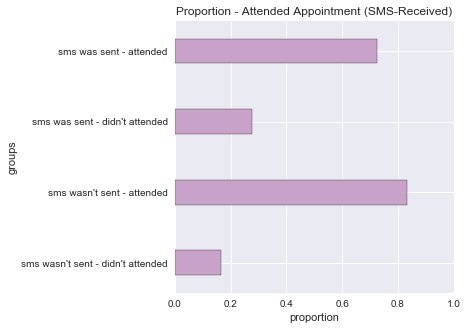

In [211]:
def getting_proportions(data, x, y):
    """
    This function was created to get the proportions of two groups
    in a dataframe in order to plot them later. Some manipulations
    will be needed, but I preferred to not automate everything in
    the function because setting the labels can be confusing without
    seing the proportions.
    
    data: must be a dataframe
    x: must be the independent variable
    y: must be the dependent variable
    
    Example: In the first case, x will be 'sms_received' and y will be
    'attended_appointment'
    
    The function will return a pandas.DataFrame with multiindex.
    
    Obs: the function will not work properly if the x or y is
    waiting_time. I have used this variable just to get the counts
    using a groupby function with x and y.
    """
    
    #getting the counts - note that here I have used a random column just
    #to obtain the counts divided by group.
    counts = data.groupby([x, y]).count()['waiting_time']

    #getting the totals
    totals = data.groupby([x]).count()['waiting_time']

    counts = counts / totals #getting the proportions

    counts = counts.reset_index() #reseting the index
    
    return counts

counts = getting_proportions(df, 'sms_received','attended_appointment')
    
labels = ["sms wasn't sent - didn't attended",
          "sms wasn't sent - attended",
          "sms was sent - didn't attended",
          "sms was sent - attended"]

#creating a new column with the plot labels
counts['label'] = labels
counts = counts[['label','waiting_time']] #selecting columns

counts.columns = ['label', 'proportions'] #renaming the columns

    #transforming the 'label column' in a index for the dataframe
counts.set_index('label', inplace=True)
    
title = 'Proportion - Attended Appointment (SMS-Received)'
#creating the plot
_ = counts.plot(kind='barh', width=0.35, figsize=(5,5), legend=False,
               title=title, edgecolor='black', color='#c8a2c8')
_ = plt.xlim(xmax=1)
_ = plt.ylabel('groups')
_ = plt.xlabel('proportion')

plt.show()

Those proportions are very strange because it seems that the SMS has a negative effect on the decision of the patients to attend the appointment. But, there may be some other factor behind this results. 

I have checked the forums at kaggle to see if there is some mistake with my results. However, other people have found the same problem as you can see here: [Kaggle Discussion](https://www.kaggle.com/joniarroba/noshowappointments/discussion/49775) and `maayanroman` who had already conducted an analysis in this dataset, suggested that most of the hospitals only sent reminders for people who had to wait a lot between the appointment was scheduled and the appointment day.

I'll test these hypotheses here too, in order to see if the waiting time is influencing the patients receiving or not a reminder of the appointment.

In order to do that, I'll use the dataframes that I have created earlier: `low_waiting_time` and `high_waiting_time`

In [212]:
#Getting the absolute values of each group
high_time_sms = str(high_waiting_time['sms_received'].value_counts())
low_time_sms = str(low_waiting_time['sms_received'].value_counts())

print('Low Waiting Time: \n' + low_time_sms + '\n')
print('High Waiting Time: \n' + high_time_sms)

Low Waiting Time: 
No     52332
Yes      906
Name: sms_received, dtype: int64

High Waiting Time: 
Yes    34576
No     22708
Name: sms_received, dtype: int64


This is interesting, it seems that some hospitals may have some kind of rule for their employees to not send SMS for the people with a low waiting time.

Since there is a correlation between the waiting time and the patient attending the appointment, it seems that `sms_receiving` variable is being influenced by the waiting time variable. Let's test this using the function that has been created earlier.

##### Hypotheses Test:
- h0: $\hat{p_1} - \hat{p_2} = 0$
- h1: $\hat{p_1} - \hat{p_2} \neq 0 $


In [213]:
p_value, lower_bound, upper_bound = hypotheses_test_and_CI(low_waiting_time, 
                                                           high_waiting_time,
                                                           'sms_received')

CI = '(' + str(lower_bound) + ', ' + str(upper_bound) + ')'

print('The confidence interval of the difference is: ' + CI)
print('P-Value: ' + str(p_value))

The confidence interval of the difference is: (0.38, 0.38)
P-Value: 0.0


##### Interpretation of the results:
$\alpha = 0.05$  
$\text{p-value} = 0.0$

With this results, we can reject the null-hypotheses that the difference between the two proportions is equal to zero and accept the alternative hypotheses that the difference between the two proportions is different than zero.

Hence, the `sms_received` variable is dependent on the `waiting_time` variable. And this is influencing the results of the comparison between `sms_received` and `attended_appointment`

But, what if we use just the dataset with a higher waiting time, is there a difference in the propotions of the people who have shown-up for their appointments and those who don't?

I'll test this too.

Text(0.5,1,'attendance ratio by sms received (high waiting time)')

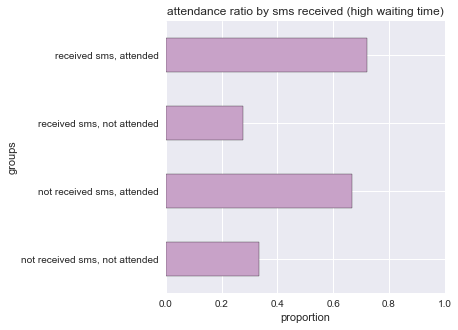

In [214]:
#getting the proportions
high_waiting_time2 = getting_proportions(high_waiting_time, 
                                         'sms_received', 
                                         'attended_appointment')

columns = ['received_sms','attended_appointment']
values = 'waiting_time'

high_waiting_time2['labels'] = ['not received sms, not attended',
                                'not received sms, attended',
                                'received sms, not attended',
                                'received sms, attended']
high_waiting_time2 = high_waiting_time2[['labels','waiting_time']]
high_waiting_time2.columns = ['groups', 'proportion']

high_waiting_time2.set_index('groups', inplace=True)

high_waiting_time2.plot(kind='barh', figsize=(5,5), legend=False,
                       edgecolor='black', color='#c8a2c8')
plt.xlim(xmax=1)
plt.xlabel('proportion')
plt.title('attendance ratio by sms received (high waiting time)')

It seems that, maybe, sending a sms for the patients helps to increase the attendance rate among the patients with a high waiting time. But, before making conclusions, let's test this hypotheses.

Firstly, I will create two subsets, one for the patients who have received the sms and one for those who don't.

In [215]:
#Creating the subset
sms_rcvd = high_waiting_time[high_waiting_time['sms_received'] == 'Yes']
sms_not_rcvd = high_waiting_time[high_waiting_time['sms_received'] == 'No']

#### Hypotheses Test:
$\text{h0: }\space \hat{p_1} - \hat{p_2} = 0$  
$\text{h1: }\space \hat{p_2} - \hat{p_2} \neq 0$

In [216]:
p_value, lower_bound, upper_bound = hypotheses_test_and_CI(sms_rcvd,
                                                           sms_not_rcvd,
                                                           'attended_appointment')
CI = '(' + str(lower_bound) + ', ' + str(upper_bound) + ')'
print('The p-value is: ' + str(p_value))
print('The difference between the proportions is: ' + CI)

The p-value is: 9.053456424800627e-46
The difference between the proportions is: (0.05, 0.06)


##### Interpreting Results:
$\alpha = 0.05$  
$ \text{p-value} \approx 0 $

According to this inference test, we can reject our null hypotheses that the difference between the two proportions are equal and accept our alternative hypotheses that the differences are different.

We are 95% confident that the difference between the two population parameters is between 5% and 6%. So, receiving an sms is correlated with a higher attendance rate among the patients that have a high waiting time.

<a id='bolsa_familia'></a>
#### Is there a significant difference in the proportions of patients who show-up for the appointments when you compare the people that receive 'Bolsa Família' and those who don't?

Bolsa Família is a program for distribution of income for poor families. In this program, the families receive a monthly amount of money to use it in the way that best suits the family needs. The value received depends on the number of people on the family and all children must be enrolled in a school to get this opportunity. The value received is low and, even though the amount of money received because of the program impact the lives of those families, they still don't have enough money to have a good quality of living.

Now, I'll use the function that I've created earlier to get the proportions related to the variables `gvt_allowance` and `attended_appointment`

Text(0.5,0,'proportion')

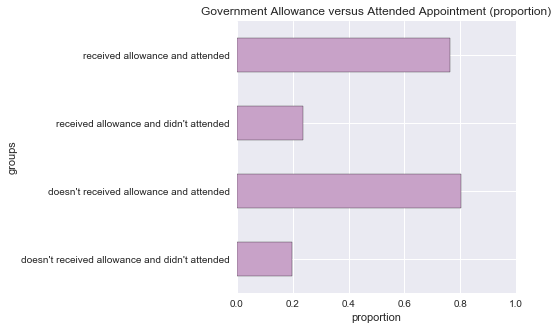

In [217]:
counts = getting_proportions(df, 'gvt_allowance', 'attended_appointment')

counts['label'] = ["doesn't received allowance and didn't attended",
                  "doesn't received allowance and attended",
                  "received allowance and didn't attended",
                  "received allowance and attended"]

counts = counts[['label','waiting_time']]
counts.columns = ['groups','proportion']
counts.set_index('groups', inplace=True)

#Creating tthe plot
title='Government Allowance versus Attended Appointment (proportion)'
counts.plot(kind='barh', title=title, figsize=(5,5), legend=False,
           edgecolor='black', color='#c8a2c8')
plt.xlim(xmax=1)
plt.xlabel('proportion')

The proportion of people who receive Bolsa Familia and attended the appointments is lower than the proportion of those people who don't receive the allowance and attended the appointments. However, before taking any conclusions, let's conduct an Hypotheses Test between those two groups.

#### Hypotheses Test:
$\text{h0: }\space \hat{p_1} - \hat{p_2} = 0$  
$\text{h1: }\space \hat{p_2} - \hat{p_2} \neq 0$


In [218]:
#Subsetting
rcv_bf = df[df['gvt_allowance'] == 'Yes']
not_rcv_bf = df[df['gvt_allowance'] == 'No']

#Making the inference
p_value, lower_bound, upper_bound = hypotheses_test_and_CI(rcv_bf, 
                                                           not_rcv_bf,
                                                           'attended_appointment')

CI = '(' + str(lower_bound) + ', ' + str(upper_bound) + ')'

print('The confidence interval of the difference is: ' + CI)
print('P-Value: ' + str(p_value))


The confidence interval of the difference is: (-0.05, -0.03)
P-Value: 3.760217656522029e-20


##### Interpretation of the results:
$\alpha = 0.05$  
$\text{p-value} \approx 0.0$

With this results, we can reject the null hypotheses that the difference between the two proportions is zero and accept the alternative hypotheses.

We are 95% confident that the difference between the people who receive bolsa familia and attend the hospital's appointments and those who don't receive the allowance is between -5% and -3%.

Here, It's important to point out that the Bolsa Familia isn't the cause of the no-shows, but other hidden factors. If those families don't receive this help from the government, the number of patients who have missed their appointments could be even worse. As I said, those families are really poor and there are a lot of things that may influence them to not showing up for the appointments.

<a id='conclusions'></a>
## Conclusions

#### Limitations of the data:
1. Most of the variables in this dataset are categorical variables, so I have decided to work more with print statements, instead of creating a bar plot to compare 2 proportions.
2. There are some variables that could have been important in the analysis like:
    - Family Income;
    - Address;
    - If the appointment was the first of this patient;
    - Only 27 days were covered by the dataset. So, sazonalities may be a risk for the conclusions;
    - If the hospital is public or private (I'm from Brazil and, in my opinion, is very difficult to get a medical appointment scheduled in the same week.
    - Doctor's specialization
    - Name of the hospital

#### Correlations found in the dataset:
- The `waiting_time` variable is strongly correlated with the `attended_appointment` variable.
- The `age` is also correlated because of the people that are older than 50 years.
- Between `gvt_allowance` and `attended_appointment`
- Between `waiting_time` and `sms_received`
- Among the patients that have a waiting time above the median, there is a positive correlation between receiving an sms and attending the appointment.

#### Final considerations

The percent of people who miss their appointments on the hospitals of Vitória is shocking and a lot of variables influence on it. The next logical step would be to create a classification model in order to predict which patients will miss the appointments.

A model with high precision would be very good for the hospitals, since they could evaluate which patients are more likely to miss the appointments and create actions to decrease the rate of missing appointments of the hospitals. This could save a lot of resources for the public and private hospitals. However, getting all information needed to be able to create a good model, in the health sector, is not easy, since there is a plenty of issues related to the ethical issues about the privacy of patient's data.

Besides that, the data is from 2016, but even in 2016, a high number of people in Brazil wasn't using sms anymore. I know that getting the whatsapp number of the patients may be a complicated thing, but I think that the hospital could thinkg in a more effective way of reminding the patients.





<a id='resources_used'></a>
#### Resources Used:

Latex:
- [Inequality sign](https://en.wikipedia.org/wiki/Equals_sign)
- [Text in functions](http://www.b-g.k12.ky.us/userfiles/1525/Classes/33386/Conditions%20of%20Tests.08-09%20rev%201.pdf)
- [Math Symbols](http://web.ift.uib.no/Teori/KURS/WRK/TeX/OLDsymALL.html)
- [Confidence Interval for two population proportions](https://www.kean.edu/~fosborne/bstat/06d2pop.html)
- [Latex-Overall Symbols](http://www.stevesque.com/symbols/)

Inference Statistics:
- [sf function](https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in)
- [chi-squared test of independence](https://onlinecourses.science.psu.edu/stat500/node/56/)
- [hypotheses test1](http://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/)
- [independent samples](https://www.nipissingu.ca/departments/student-development-and-services/academic-skills/resources/Documents/Independent-Samples-vs-Dependent-Samples.pdf)
- [hypotheses testing and CI](http://www.b-g.k12.ky.us/userfiles/1525/Classes/33386/Conditions%20of%20Tests.08-09%20rev%201.pdf)
- [p-value](http://www.b-g.k12.ky.us/userfiles/1525/Classes/33386/Conditions%20of%20Tests.08-09%20rev%201.pdf)
- [Chisquare Function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)
- [Pearsonr - Correlation](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.pearsonr.html)

Seaborn:
- [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
- [Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Numpy:
- [np.Where function](https://medium.com/@emayoung95/using-numpy-where-function-to-replace-for-loops-with-if-else-statements-a1e6044ac4c1)

Pandas:
- [pd.value_counts function](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.value_counts.html)
- [Operations between dates](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
- [Operations between dates 2](https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer)

Kaggle - Informations about the dataset:
- [Data Dictionary](https://www.kaggle.com/joniarroba/noshowappointments/home)
- [Pregnant Women](https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457#latest-276504)
- [Waiting Time versus SMS Received](https://www.kaggle.com/joniarroba/noshowappointments/discussion/49775)

Colors:  
[Hex Colors](https://www.color-hex.com/)


